## Adjust stop words

In [70]:
from sklearn.feature_extraction import text 

text.ENGLISH_STOP_WORDS

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [71]:
add_stop_words = ['tucker', 'carlson', 'fox', 'news', 'five', 
                'greg', 'gutfeld', 'dana', 'perino', 'jesse', 'watters', 
                'jeanine', 'pirro', 'geraldo', 'rivera', 'jessica', 'tarlov',
                'harold', 'ford', 'jr', 'ok', 'williams',  'pavlich', 
                'mcdowell', 'juan']

In [72]:
full_stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

## Load in Data

In [73]:
#import libraries
import glob 
import os
import matplotlib.pyplot as plt

#step 1: get a list of file names to read into the dataset
repo_path = os.path.dirname(os.getcwd()) #get the correct file path 
tc_paths = glob.glob(repo_path + "/data/01-raw/tucker_carlson/*.txt") #the paths for the tucker carlson transcript files
tf_paths = glob.glob(repo_path + '/data/01-raw/the_five/*.txt') #the paths for the five transcript files

all_conservative_files = tc_paths + tf_paths #all conservative transcripts

In [74]:
raw_text = [] #create a container to hold the datafiles 

#step 2: read in each transcript as its own string and append to the list of raw documents
for transcript in all_conservative_files:
    text = open(transcript, encoding = 'utf-8', errors = 'ignore').read()  # ignored a few characters that were not ASCII
    raw_text.append(text)

In [75]:
print("Our conservative news corpus consists of {:,} total transcripts, sourced from Tucker Carlson Tonight and The Five.".format(len(raw_text)))

Our conservative news corpus consists of 458 total transcripts, sourced from Tucker Carlson Tonight and The Five.


## Data Pre-Processing

### Spacy Implementation & Removal of Stop Words 
This analysis is useful if we want more control over the corpus of stop words that are used in our analysis

In [ ]:
#Compare spacy implemtation to the sklearn #loads spacy and turns off some aspects 
# import spacy
# nlp = spacy.load('en_core_web_sm', disable=['ner', 'parser'])

## Word- Frequency Analysis

### Use CountVectorizer to get the unique vocabulary list and eliminate stop words

In [76]:
#import the required package for the tfidf vector
from sklearn.feature_extraction.text import CountVectorizer

#step 1: set up the tfidf vectorizer
vectorizer = CountVectorizer(min_df = 50, 
                             stop_words = full_stop_words, 
                             max_df = 0.8) 
 
#step 2: apply the vectorizer to the corpus of documents (& store in document matrix X )
X = vectorizer.fit(raw_text) #should we use just .fit or .fit_transform? The latter actually results in the creation of a matrix object (where # of cols = # of words in the vocab)

#step 3: print out the vocabulary found by the tfid object
print("There are {:,} unique words in the vocabulary.".format(len(X.vocabulary_)))

There are 2,642 unique words in the vocabulary.


### Get a Word-Frequency Table from CountVectorizer

In [77]:
X_transformed = vectorizer.fit_transform(raw_text)

In [78]:
array_of_words = vectorizer.get_feature_names()
array_of_words

['00',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '150',
 '16',
 '17',
 '18',
 '19',
 '20',
 '200',
 '2016',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '21',
 '22',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '300',
 '35',
 '40',
 '400',
 '45',
 '48',
 '50',
 '500',
 '60',
 '600',
 '6th',
 '70',
 '700',
 '75',
 '80',
 '800',
 '90',
 'abandoned',
 'abc',
 'ability',
 'absolute',
 'absurd',
 'abuse',
 'accept',
 'access',
 'accident',
 'according',
 'account',
 'accountability',
 'accountable',
 'accurate',
 'accused',
 'accusing',
 'acknowledge',
 'act',
 'acted',
 'acting',
 'action',
 'actions',
 'active',
 'activist',
 'activists',
 'activity',
 'actor',
 'acts',
 'actual',
 'ad',
 'adam',
 'adams',
 'add',
 'added',
 'adding',
 'addition',
 'additional',
 'address',
 'addressing',
 'admit',
 'admitted',
 'admitting',
 'adult',
 'adults',
 'advance',
 'advanced',
 'advantage',
 'advice',
 'adviser',
 'affect',
 'affected',
 'affects',
 'afford',
 'afghanistan',
 'afr

In [79]:
array_of_counts = X_transformed.toarray().sum(axis=0) #sum the number of occurences of a word across the entire conservative corpus
array_of_counts

array([843, 922, 424, ..., 254,  95, 107], dtype=int64)

In [80]:
word_frequency_dictionary = dict(zip(array_of_words,array_of_counts))

In [83]:
from operator import itemgetter

#set the number of top words to see
num_top_words = 10

top_10_words = dict(sorted(word_frequency_dictionary.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_10_words)

{'police': 2696, 'thanks': 1802, 'unidentified': 1747, 'crosstalk': 1735, 'school': 1640, 'black': 1624, 'china': 1615, 'quote': 1580, 'kids': 1575, 'vaccine': 1573, 'crime': 1537, 'border': 1477, 'coronavirus': 1409, 'mask': 1391, 'health': 1351, 'children': 1312, 'governor': 1256, 'fauci': 1223, 'federal': 1221, 'virus': 1214}


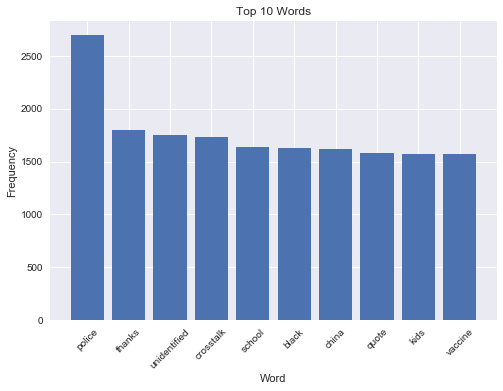

In [82]:
# china and vaccine are interesting top 10 words

plt.style.use('seaborn')  

x = top_10_words.keys()
y = top_10_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 Words')

plt.show()

In [84]:
# Also looked at top 20 words to see if there are more COVID-related terms

num_top_words = 20

top_20_words = dict(sorted(word_frequency_dictionary.items(), key = itemgetter(1), reverse = True)[:num_top_words])

print(top_20_words)

{'police': 2696, 'thanks': 1802, 'unidentified': 1747, 'crosstalk': 1735, 'school': 1640, 'black': 1624, 'china': 1615, 'quote': 1580, 'kids': 1575, 'vaccine': 1573, 'crime': 1537, 'border': 1477, 'coronavirus': 1409, 'mask': 1391, 'health': 1351, 'children': 1312, 'governor': 1256, 'fauci': 1223, 'federal': 1221, 'virus': 1214}


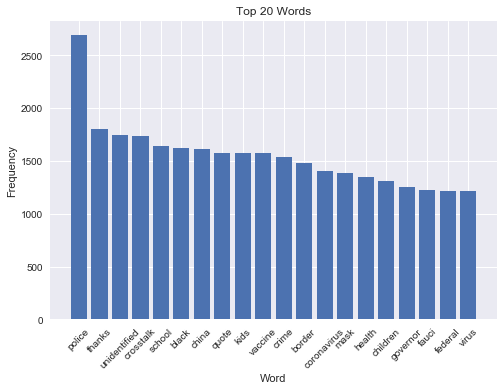

In [85]:
plt.style.use('seaborn')  

x = top_20_words.keys()
y = top_20_words.values()
plt.bar(x,y)
plt.xlabel('Word')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 20 Words')

plt.show()